In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
f_1d = uproot.open("../LEEana/file_collapsed_covariance_matrix.root")
f_2d = uproot.open("../TLee_Np0p/file_collapsed_covariance_matrix.root")
# f_2d_alternate = uproot.open("../TLee_improved_version/file_collapsed_covariance_matrix.root") # this is sig_bkg_constr_v3, should have even more information

f_merge_1d = uproot.open("../LEEana/merge.root")
f_merge_2d = uproot.open("../TLee_Np0p/data_inputs/merge.root")

mat_collapse_1d = f_merge_1d["mat_collapse"].member("fElements").reshape((216, 72))
mat_collapse_2d = f_merge_2d["mat_collapse"].member("fElements").reshape((288, 72))


In [3]:
f_1d.keys()

['matrix_absolute_cov_newworld;1',
 'matrix_absolute_flux_cov_newworld;1',
 'matrix_absolute_Xs_cov_newworld;1',
 'matrix_absolute_detector_cov_newworld;1',
 'matrix_absolute_mc_stat_cov_newworld;1',
 'matrix_absolute_additional_cov_newworld;1',
 'matrix_absolute_detector_sub_cov_newworld_01;1',
 'matrix_absolute_detector_sub_cov_newworld_02;1',
 'matrix_absolute_detector_sub_cov_newworld_03;1',
 'matrix_absolute_detector_sub_cov_newworld_04;1',
 'matrix_absolute_detector_sub_cov_newworld_06;1',
 'matrix_absolute_detector_sub_cov_newworld_07;1',
 'matrix_absolute_detector_sub_cov_newworld_08;1',
 'matrix_absolute_detector_sub_cov_newworld_09;1',
 'matrix_absolute_detector_sub_cov_newworld_10;1',
 'matrix_pred_newworld;1',
 'matrix_data_newworld;1',
 'matrix_sub_flux_geant4_Xs_newworld_1;1',
 'matrix_sub_flux_geant4_Xs_newworld_2;1',
 'matrix_sub_flux_geant4_Xs_newworld_3;1',
 'matrix_sub_flux_geant4_Xs_newworld_4;1',
 'matrix_sub_flux_geant4_Xs_newworld_5;1',
 'matrix_sub_flux_geant4_X

In [4]:
f_merge_1d.keys()

['mat_collapse;1',
 'cov_mat_add;1',
 'histo_1;1',
 'histo_17;1',
 'histo_2;1',
 'histo_3;1',
 'histo_18;1',
 'histo_4;1',
 'histo_5;1',
 'histo_19;1',
 'histo_6;1',
 'histo_7;1',
 'histo_20;1',
 'histo_8;1',
 'histo_9;1',
 'histo_21;1',
 'histo_10;1',
 'histo_11;1',
 'histo_22;1',
 'histo_12;1',
 'histo_13;1',
 'histo_23;1',
 'histo_14;1',
 'histo_15;1',
 'histo_24;1',
 'histo_16;1',
 'hdata_obsch_1;1',
 'hmc_obsch_1;1',
 'hdata_obsch_2;1',
 'hmc_obsch_2;1',
 'hdata_obsch_3;1',
 'hmc_obsch_3;1',
 'hdata_obsch_4;1',
 'hmc_obsch_4;1',
 'hdata_obsch_5;1',
 'hmc_obsch_5;1',
 'hdata_obsch_6;1',
 'hmc_obsch_6;1',
 'hdata_obsch_7;1',
 'hmc_obsch_7;1',
 'hdata_obsch_8;1',
 'hmc_obsch_8;1']

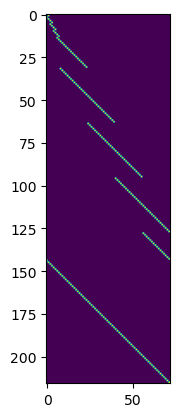

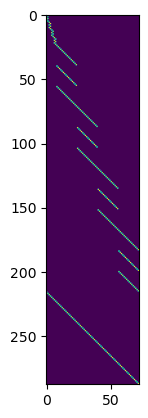

In [5]:
plt.imshow(mat_collapse_1d)
plt.show()

plt.imshow(mat_collapse_2d)
plt.show()

In [6]:
pred_1d = f_1d["matrix_pred_newworld"].member("fElements")
pred_2d = f_2d["matrix_pred_newworld"].member("fElements")
data_1d = f_1d["matrix_data_newworld"].member("fElements")
data_2d = f_2d["matrix_data_newworld"].member("fElements")

cov_1d = f_1d["matrix_absolute_cov_newworld"].member("fElements").reshape((72, 72))
cov_2d = f_2d["matrix_absolute_cov_newworld"].member("fElements").reshape((72, 72))

frac_cov_1d = cov_1d / np.outer(pred_1d, pred_1d)
frac_cov_2d = cov_2d / np.outer(pred_2d, pred_2d)

frac_errs_1d = np.sqrt(np.diag(frac_cov_1d))
frac_errs_2d = np.sqrt(np.diag(frac_cov_2d))

/tmp/ipykernel_2980157/3470363877.py:9: RuntimeWarning: divide by zero encountered in divide
  frac_cov_1d = cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3470363877.py:9: RuntimeWarning: invalid value encountered in divide
  frac_cov_1d = cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3470363877.py:10: RuntimeWarning: divide by zero encountered in divide
  frac_cov_2d = cov_2d / np.outer(pred_2d, pred_2d)
/tmp/ipykernel_2980157/3470363877.py:10: RuntimeWarning: invalid value encountered in divide
  frac_cov_2d = cov_2d / np.outer(pred_2d, pred_2d)


# Total Collapsed Fractional Uncertainty

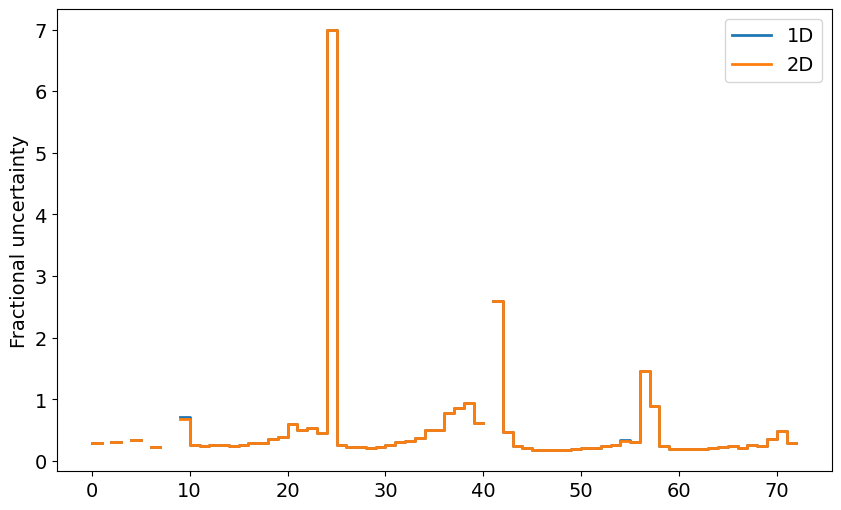

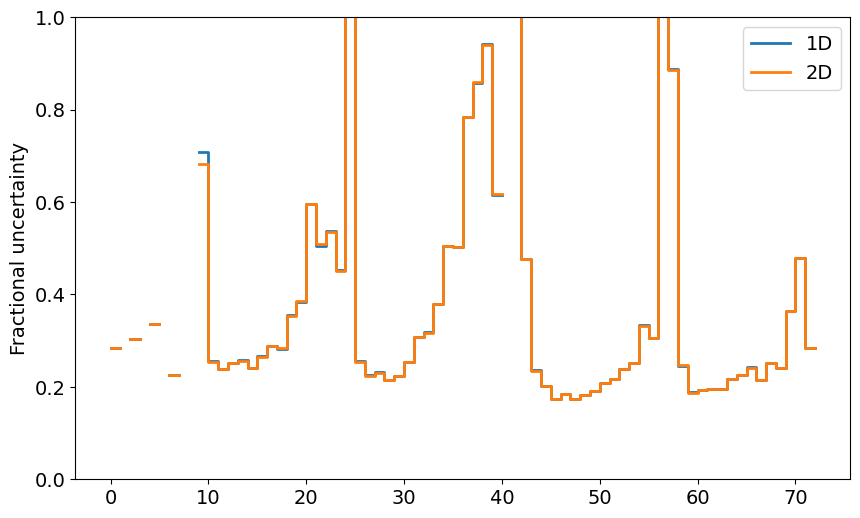

In [7]:
# font size
mpl.rcParams.update({'font.size': 14})

def my_step(values, label=None, c=None, ls=None):
    values = list(values)
    values = values + [values[-1]]
    plt.step(np.arange(len(values)), values, where="post", label=label, lw=2, c=c, ls=ls)

plt.figure(figsize=(10, 6))
my_step(frac_errs_1d, "1D")
my_step(frac_errs_2d, "2D")
plt.ylabel("Fractional uncertainty")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
my_step(frac_errs_1d, "1D")
my_step(frac_errs_2d, "2D")
plt.ylim(0, 1)
plt.ylabel("Fractional uncertainty")
plt.legend()
plt.show()


# Uncertainty Breakdown

/tmp/ipykernel_2980157/3735627395.py:7: RuntimeWarning: invalid value encountered in divide
  flux_frac_cov_1d = flux_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:8: RuntimeWarning: invalid value encountered in divide
  xs_frac_cov_1d = xs_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:9: RuntimeWarning: invalid value encountered in divide
  det_frac_cov_1d = det_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:10: RuntimeWarning: divide by zero encountered in divide
  mc_stat_frac_cov_1d = mc_stat_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:10: RuntimeWarning: invalid value encountered in divide
  mc_stat_frac_cov_1d = mc_stat_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:11: RuntimeWarning: invalid value encountered in divide
  add_frac_cov_1d = add_cov_1d / np.outer(pred_1d, pred_1d)
/tmp/ipykernel_2980157/3735627395.py:25: RuntimeWarning: invalid val

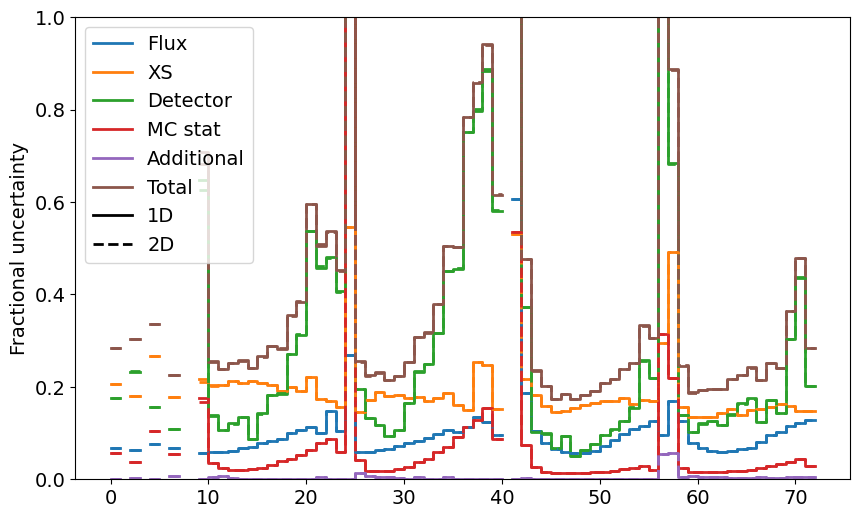

In [8]:
flux_cov_1d = f_1d["matrix_absolute_flux_cov_newworld"].member("fElements").reshape((72, 72))
xs_cov_1d = f_1d["matrix_absolute_Xs_cov_newworld"].member("fElements").reshape((72, 72))
det_cov_1d = f_1d["matrix_absolute_detector_cov_newworld"].member("fElements").reshape((72, 72))
mc_stat_cov_1d = f_1d["matrix_absolute_mc_stat_cov_newworld"].member("fElements").reshape((72, 72))
add_cov_1d = f_1d["matrix_absolute_additional_cov_newworld"].member("fElements").reshape((72, 72))

flux_frac_cov_1d = flux_cov_1d / np.outer(pred_1d, pred_1d)
xs_frac_cov_1d = xs_cov_1d / np.outer(pred_1d, pred_1d)
det_frac_cov_1d = det_cov_1d / np.outer(pred_1d, pred_1d)
mc_stat_frac_cov_1d = mc_stat_cov_1d / np.outer(pred_1d, pred_1d)
add_frac_cov_1d = add_cov_1d / np.outer(pred_1d, pred_1d)

flux_errs_1d = np.sqrt(np.diag(flux_frac_cov_1d))
xs_errs_1d = np.sqrt(np.diag(xs_frac_cov_1d))
det_errs_1d = np.sqrt(np.diag(det_frac_cov_1d))
mc_stat_errs_1d = np.sqrt(np.diag(mc_stat_frac_cov_1d))
add_errs_1d = np.sqrt(np.diag(add_frac_cov_1d))

flux_cov_2d = f_2d["matrix_absolute_flux_cov_newworld"].member("fElements").reshape((72, 72))
xs_cov_2d = f_2d["matrix_absolute_Xs_cov_newworld"].member("fElements").reshape((72, 72))
det_cov_2d = f_2d["matrix_absolute_detector_cov_newworld"].member("fElements").reshape((72, 72))
mc_stat_cov_2d = f_2d["matrix_absolute_mc_stat_cov_newworld"].member("fElements").reshape((72, 72))
add_cov_2d = f_2d["matrix_absolute_additional_cov_newworld"].member("fElements").reshape((72, 72))

flux_frac_cov_2d = flux_cov_2d / np.outer(pred_2d, pred_2d)
xs_frac_cov_2d = xs_cov_2d / np.outer(pred_2d, pred_2d)
det_frac_cov_2d = det_cov_2d / np.outer(pred_2d, pred_2d)
mc_stat_frac_cov_2d = mc_stat_cov_2d / np.outer(pred_2d, pred_2d)
add_frac_cov_2d = add_cov_2d / np.outer(pred_2d, pred_2d)

flux_errs_2d = np.sqrt(np.diag(flux_frac_cov_2d))
xs_errs_2d = np.sqrt(np.diag(xs_frac_cov_2d))
det_errs_2d = np.sqrt(np.diag(det_frac_cov_2d))
mc_stat_errs_2d = np.sqrt(np.diag(mc_stat_frac_cov_2d))
add_errs_2d = np.sqrt(np.diag(add_frac_cov_2d))

plt.figure(figsize=(10, 6))

my_step(flux_errs_1d, label="Flux", c="C0")
my_step(xs_errs_1d, label="XS", c="C1")
my_step(det_errs_1d, label="Detector", c="C2")
my_step(mc_stat_errs_1d, label="MC stat", c="C3")
my_step(add_errs_1d, label="Additional", c="C4")
my_step(frac_errs_1d, label="Total", c="C5")

my_step(flux_errs_2d, label="", c="C0", ls="--")
my_step(xs_errs_2d, label="", c="C1", ls="--")
my_step(det_errs_2d, label="", c="C2", ls="--")
my_step(mc_stat_errs_2d, label="", c="C3", ls="--")
my_step(add_errs_2d, label="", c="C4", ls="--")
my_step(frac_errs_2d, label="", c="C5", ls="--")

my_step([-100], "1D", c="k")
my_step([-100], "2D", c="k", ls="--")

plt.ylim(0, 1)

plt.ylabel("Fractional uncertainty")
plt.legend()
plt.show()



# Calculating Chi2 Values

In [9]:
# calculate CNP data statistical uncertainty

"""
/// CNP
if( val_meas==0 ) val_stat_cov = val_pred/2;
else val_stat_cov = 3./( 1./val_meas + 2./val_pred );
if( val_meas==0 && val_pred==0 ) val_stat_cov = 1e-6;
"""

data_stat_cov_1d = np.zeros((72, 72))
for i in range(72):
    if data_1d[i] == 0:
        val_stat_cov = pred_1d[i] / 2
    else:
        val_stat_cov = 3 / (1 / data_1d[i] + 2 / pred_1d[i])
    if data_1d[i] == 0 and pred_1d[i] == 0:
        val_stat_cov = 1e-6
    data_stat_cov_1d[i, i] = val_stat_cov

data_stat_cov_2d = np.zeros((72, 72))
for i in range(72):
    if data_2d[i] == 0:
        val_stat_cov = pred_2d[i] / 2
    else:
        val_stat_cov = 3 / (1 / data_2d[i] + 2 / pred_2d[i])
    if data_2d[i] == 0 and pred_2d[i] == 0:
        val_stat_cov = 1e-6
    data_stat_cov_2d[i, i] = val_stat_cov


In [10]:
cov_1d_with_data_stat = cov_1d + data_stat_cov_1d
cov_2d_with_data_stat = cov_2d + data_stat_cov_2d

chi2_1d = (data_1d - pred_1d) @ np.linalg.inv(cov_1d_with_data_stat) @ (data_1d - pred_1d)
chi2_2d = (data_2d - pred_2d) @ np.linalg.inv(cov_2d_with_data_stat) @ (data_2d - pred_2d)


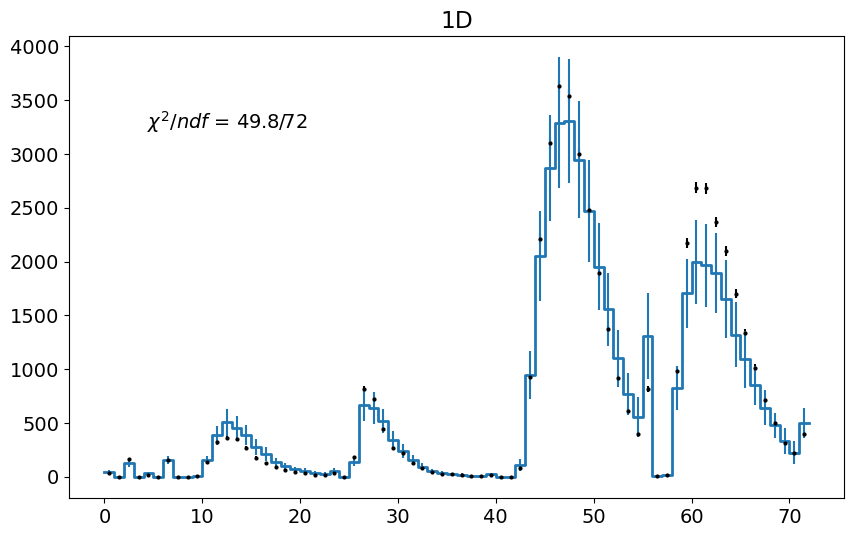

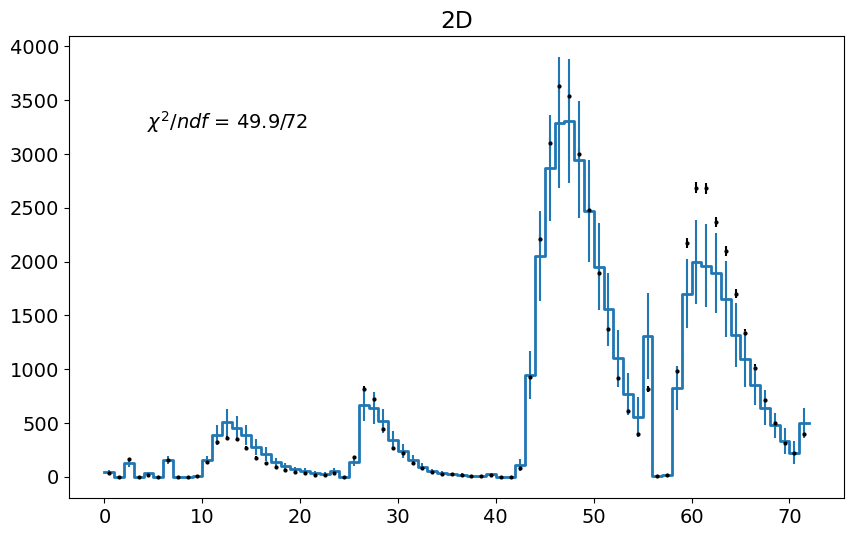

In [11]:
bins = np.linspace(0, 72, 73)
bin_centers = (bins[1:] + bins[:-1]) / 2

plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, data_1d, yerr=np.sqrt(data_1d), fmt="o", c="k", markersize=2)
my_step(pred_1d, c="C0")
plt.errorbar(bin_centers, pred_1d, yerr=np.sqrt(np.diag(cov_1d)), fmt="", c="C0", ls="")
plt.text(0.1, 0.8, f"$\chi^2/ndf$ = {chi2_1d:.1f}/{len(pred_1d)}", fontsize=14, transform=plt.gca().transAxes)
plt.title("1D")
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, data_2d, yerr=np.sqrt(data_2d), fmt="o", c="k", markersize=2)
my_step(pred_2d, c="C0")
plt.errorbar(bin_centers, pred_2d, yerr=np.sqrt(np.diag(cov_2d)), fmt="", c="C0", ls="")
plt.text(0.1, 0.8, f"$\chi^2/ndf$ = {chi2_2d:.1f}/{len(pred_2d)}", fontsize=14, transform=plt.gca().transAxes)
plt.title("2D")
plt.show()


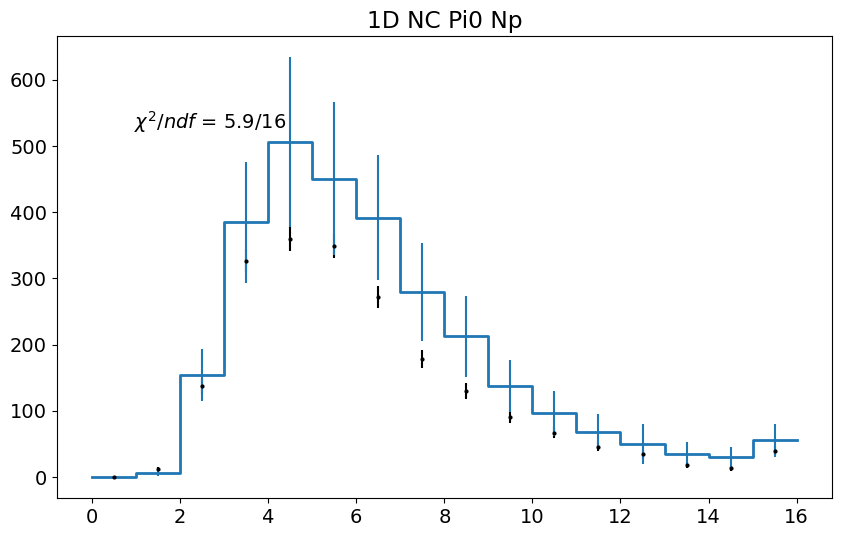

In [12]:
# NC Pi0 Np channel

ncpi0Np_bins = np.linspace(0, 16, 17)
ncpi0Np_bin_centers = (ncpi0Np_bins[1:] + ncpi0Np_bins[:-1]) / 2

data_1d_ncpi0Np = data_1d[8:8+16]
pred_1d_ncpi0Np = pred_1d[8:8+16]
cov_1d_ncpi0Np = cov_1d[8:8+16, 8:8+16]
cov_1d_with_data_stat_ncpi0Np = cov_1d_with_data_stat[8:8+16, 8:8+16]
chi2_1d_ncpi0Np = (data_1d_ncpi0Np - pred_1d_ncpi0Np) @ np.linalg.inv(cov_1d_with_data_stat_ncpi0Np) @ (data_1d_ncpi0Np - pred_1d_ncpi0Np)

plt.figure(figsize=(10, 6))
plt.errorbar(ncpi0Np_bin_centers, data_1d_ncpi0Np, yerr=np.sqrt(data_1d_ncpi0Np), fmt="o", c="k", markersize=2)
my_step(pred_1d_ncpi0Np, c="C0")
plt.errorbar(ncpi0Np_bin_centers, pred_1d_ncpi0Np, yerr=np.sqrt(np.diag(cov_1d_ncpi0Np)), fmt="", c="C0", ls="")
plt.text(0.1, 0.8, f"$\chi^2/ndf$ = {chi2_1d_ncpi0Np:.1f}/{len(pred_1d_ncpi0Np)}", fontsize=14, transform=plt.gca().transAxes)
plt.title("1D NC Pi0 Np")
plt.show()



# Doing things with Uncollapsed Matrices

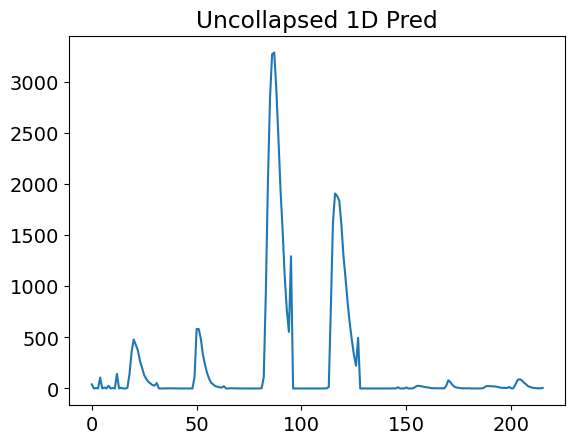

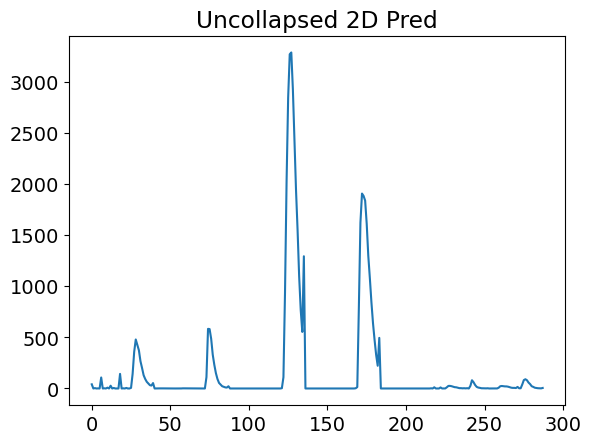

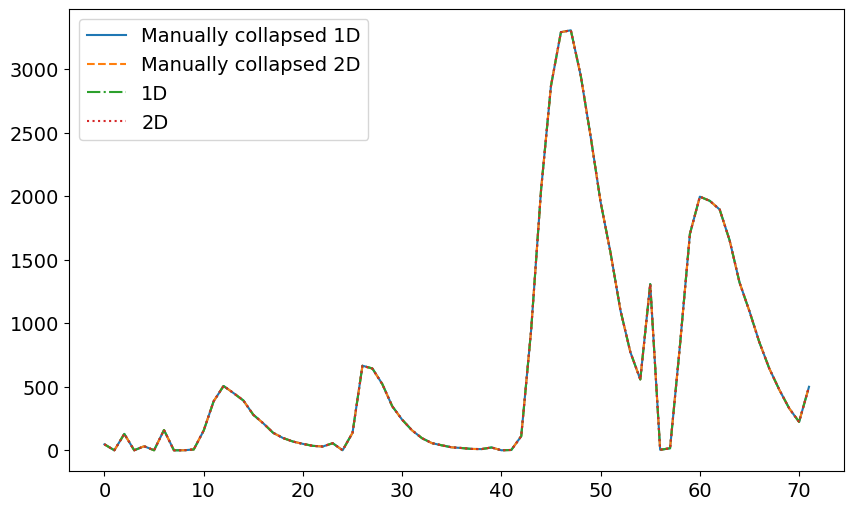

In [13]:
uncollapsed_pred_1d = []
for histonum in range(1, 25):
    uncollapsed_pred_1d += list(f_merge_1d[f"histo_{histonum}"].values(flow=True))[1:]

uncollapsed_pred_2d = []
for histonum in range(1, 33):
    uncollapsed_pred_2d += list(f_merge_2d[f"histo_{histonum}"].values(flow=True))[1:]
f_merge_2d
plt.figure()
plt.plot(uncollapsed_pred_1d)
plt.title("Uncollapsed 1D Pred")
plt.show()

plt.figure()
plt.plot(uncollapsed_pred_2d)
plt.title("Uncollapsed 2D Pred")
plt.show()

manually_collapsed_pred_1d = mat_collapse_1d.T @ uncollapsed_pred_1d
manually_collapsed_pred_2d = mat_collapse_2d.T @ uncollapsed_pred_2d

plt.figure(figsize=(10, 6))
plt.plot(manually_collapsed_pred_1d, label="Manually collapsed 1D")
plt.plot(manually_collapsed_pred_2d, ls="--", label="Manually collapsed 2D")
plt.plot(pred_1d, ls="-.", label="1D")
plt.plot(pred_2d, ls=":", label="2D")
plt.legend()
plt.show()



/tmp/ipykernel_2980157/841340552.py:16: RuntimeWarning: invalid value encountered in divide
  uncollapsed_frac_cov_1d = uncollapsed_cov_1d / np.outer(uncollapsed_pred_1d, uncollapsed_pred_1d)
/tmp/ipykernel_2980157/841340552.py:17: RuntimeWarning: invalid value encountered in divide
  uncollapsed_frac_cov_2d = uncollapsed_cov_2d / np.outer(uncollapsed_pred_2d, uncollapsed_pred_2d)
/tmp/ipykernel_2980157/841340552.py:19: RuntimeWarning: invalid value encountered in divide
  manually_collapsed_frac_cov_1d = manually_collapsed_cov_1d / np.outer(manually_collapsed_pred_1d, manually_collapsed_pred_1d)
/tmp/ipykernel_2980157/841340552.py:20: RuntimeWarning: invalid value encountered in divide
  manually_collapsed_frac_cov_2d = manually_collapsed_cov_2d / np.outer(manually_collapsed_pred_2d, manually_collapsed_pred_2d)


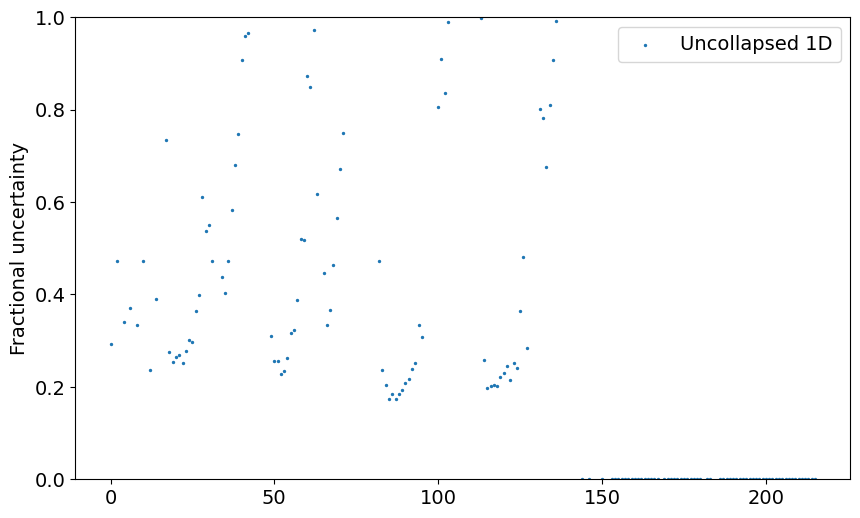

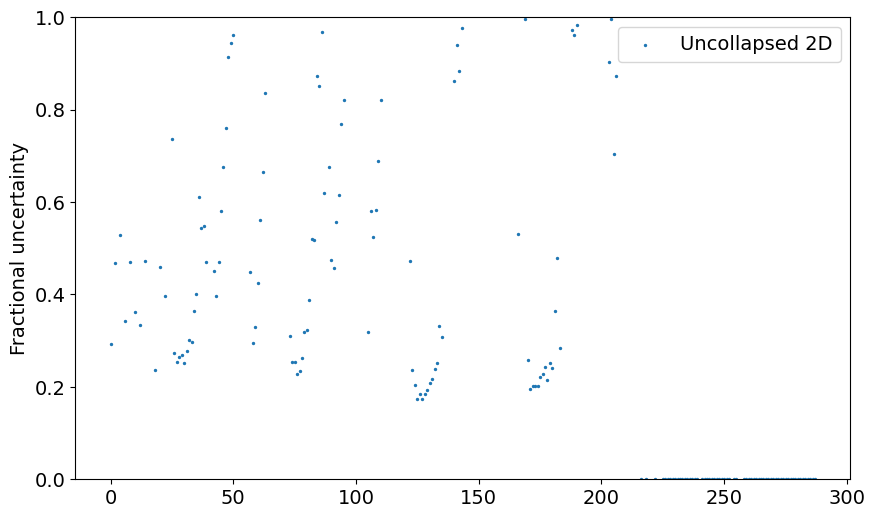

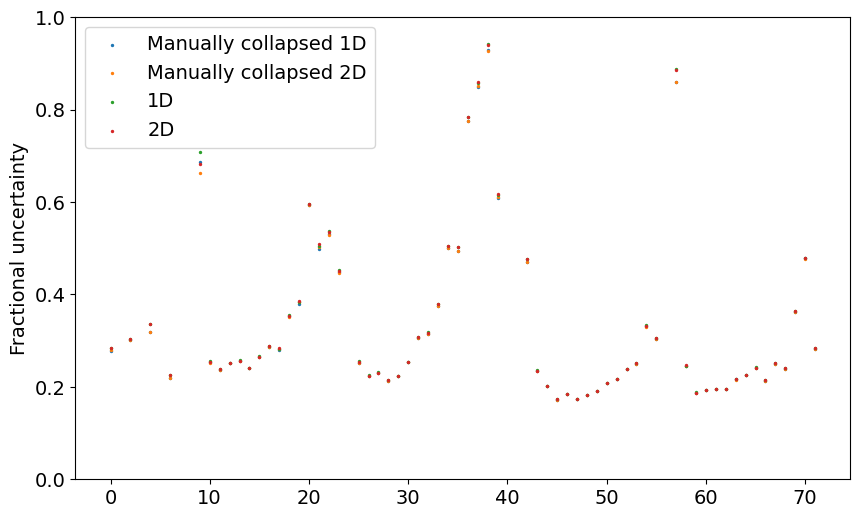

In [14]:
with open("../LEEana/matrix_absolute_cov_oldworld.txt", "r") as f:
    lines = f.readlines()
uncollapsed_cov_1d = np.zeros((216, 216))
for i, line in enumerate(lines):
    uncollapsed_cov_1d[i] = np.array([float(x) for x in line.split()])

with open("../TLee_Np0p/matrix_absolute_cov_oldworld.txt", "r") as f:
    lines = f.readlines()
uncollapsed_cov_2d = np.zeros((288, 288))
for i, line in enumerate(lines):
    uncollapsed_cov_2d[i] = np.array([float(x) for x in line.split()])

manually_collapsed_cov_1d = mat_collapse_1d.T @ uncollapsed_cov_1d @ mat_collapse_1d
manually_collapsed_cov_2d = mat_collapse_2d.T @ uncollapsed_cov_2d @ mat_collapse_2d

uncollapsed_frac_cov_1d = uncollapsed_cov_1d / np.outer(uncollapsed_pred_1d, uncollapsed_pred_1d)
uncollapsed_frac_cov_2d = uncollapsed_cov_2d / np.outer(uncollapsed_pred_2d, uncollapsed_pred_2d)

manually_collapsed_frac_cov_1d = manually_collapsed_cov_1d / np.outer(manually_collapsed_pred_1d, manually_collapsed_pred_1d)
manually_collapsed_frac_cov_2d = manually_collapsed_cov_2d / np.outer(manually_collapsed_pred_2d, manually_collapsed_pred_2d)

plt.figure(figsize=(10, 6))
plt.scatter(range(216), np.sqrt(np.diag(uncollapsed_frac_cov_1d)), label="Uncollapsed 1D", s=2)
plt.legend()
plt.ylabel("Fractional uncertainty")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(288), np.sqrt(np.diag(uncollapsed_frac_cov_2d)), label="Uncollapsed 2D", s=2)
plt.legend()
plt.ylabel("Fractional uncertainty")
plt.ylim(0, 1)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(range(72), np.sqrt(np.diag(manually_collapsed_frac_cov_1d)), label="Manually collapsed 1D", s=2)
plt.scatter(range(72), np.sqrt(np.diag(manually_collapsed_frac_cov_2d)), label="Manually collapsed 2D", s=2)
plt.scatter(range(72), np.sqrt(np.diag(frac_cov_1d)), label="1D", s=2)
plt.scatter(range(72), np.sqrt(np.diag(frac_cov_2d)), label="2D", s=2)
plt.legend()
plt.ylabel("Fractional uncertainty")
plt.ylim(0, 1)
plt.show()



# Doing things with LEE scaling

In [15]:
mat_collapse_1000_1d = np.copy(mat_collapse_1d)
for i in range(len(mat_collapse_1000_1d)):
    if 0 <= i < 2: continue # WC 1gNp bkg
    elif 2 <= i < 4: mat_collapse_1000_1d[i,:] *= 1000 # WC 1gNp sig
    elif 4 <= i < 6: continue # WC 1g0p bkg
    elif 6 <= i < 8: mat_collapse_1000_1d[i,:] *= 1000 # WC 1g0p sig
    elif 8 <= i < 10: continue # gLEE 1g1p bkg
    elif 10 <= i < 12: mat_collapse_1000_1d[i,:] *= 1000 # gLEE 1g1p sig
    elif 12 <= i < 14: continue # gLEE 1g0p bkg
    elif 14 <= i < 16: mat_collapse_1000_1d[i,:] *= 1000 # gLEE 1g0p sig
    else: continue

mat_collapse_1000_2d = np.copy(mat_collapse_2d)
for i in range(len(mat_collapse_1000_2d)):
    if 0 <= i < 2: continue # WC 1gNp bkg
    elif 2 <= i < 4: mat_collapse_1000_2d[i,:] *= 1000 # WC 1gNp Np sig
    elif 4 <= i < 6: mat_collapse_1000_2d[i,:] *= 1000 # WC 1gNp 0p bkg
    elif 6 <= i < 8: continue # WC 1g0p bkg
    elif 8 <= i < 10: mat_collapse_1000_2d[i,:] *= 1000 # WC 1g0p Np sig
    elif 10 <= i < 12: mat_collapse_1000_2d[i,:] *= 1000 # WC 1g0p 0p bkg
    elif 12 <= i < 14: continue # gLEE 1g1p bkg
    elif 14 <= i < 16: mat_collapse_1000_2d[i,:] *= 1000 # gLEE 1g1p Np sig
    elif 16 <= i < 18: mat_collapse_1000_2d[i,:] *= 1000 # gLEE 1g1p 0p bkg
    elif 18 <= i < 20: continue # gLEE 1g0p bkg
    elif 20 <= i < 22: mat_collapse_1000_2d[i,:] *= 1000 # gLEE 1g0p Np sig
    elif 22 <= i < 24: mat_collapse_1000_2d[i,:] *= 1000 # gLEE 1g0p 0p bkg
    else: continue


/tmp/ipykernel_2980157/1718861038.py:7: RuntimeWarning: invalid value encountered in divide
  manually_collapsed_frac_cov_1000_1d = manually_collapsed_cov_1000_1d / np.outer(manually_collapsed_pred_1000_1d, manually_collapsed_pred_1000_1d)
/tmp/ipykernel_2980157/1718861038.py:8: RuntimeWarning: invalid value encountered in divide
  manually_collapsed_frac_cov_1000_2d = manually_collapsed_cov_1000_2d / np.outer(manually_collapsed_pred_1000_2d, manually_collapsed_pred_1000_2d)


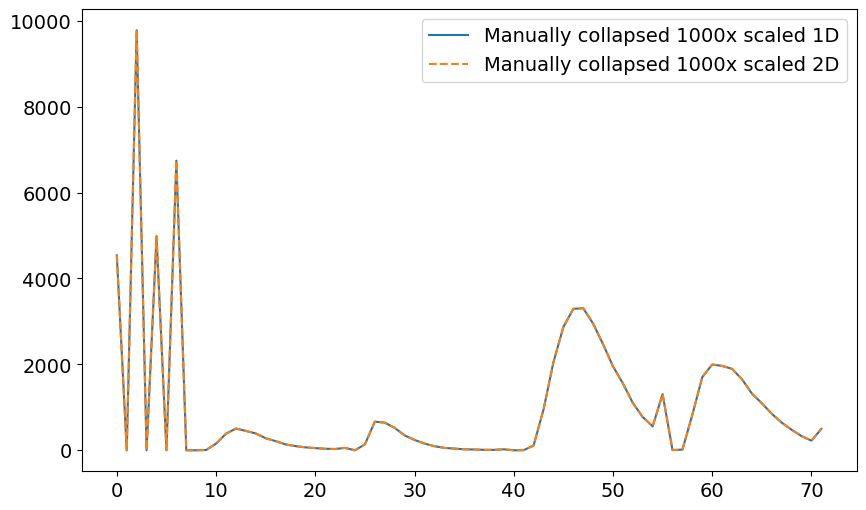

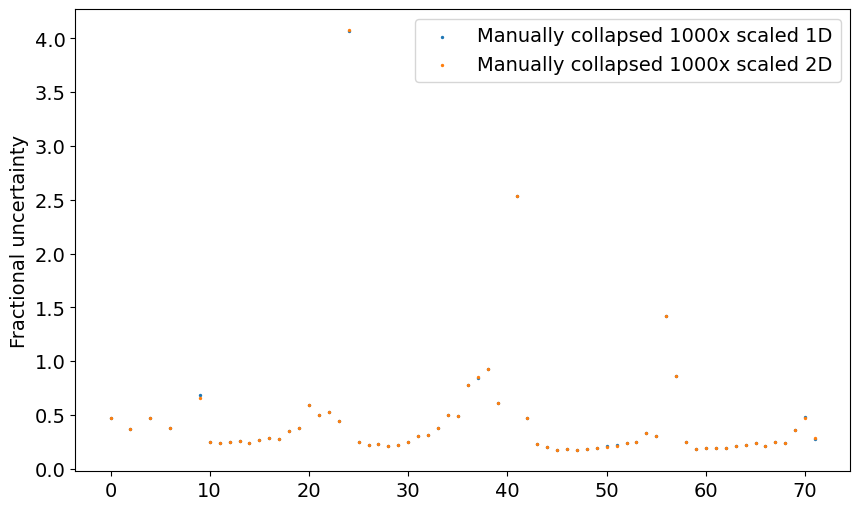

[0.46995432        nan 0.36780125        nan 0.47120616        nan
 0.38300723        nan]
[0.46981453        nan 0.36818589        nan 0.47099562        nan
 0.38303607        nan]


In [20]:
manually_collapsed_pred_1000_1d = mat_collapse_1000_1d.T @ uncollapsed_pred_1d
manually_collapsed_pred_1000_2d = mat_collapse_1000_2d.T @ uncollapsed_pred_2d

manually_collapsed_cov_1000_1d = mat_collapse_1000_1d.T @ uncollapsed_cov_1d @ mat_collapse_1000_1d
manually_collapsed_cov_1000_2d = mat_collapse_1000_2d.T @ uncollapsed_cov_2d @ mat_collapse_1000_2d

manually_collapsed_frac_cov_1000_1d = manually_collapsed_cov_1000_1d / np.outer(manually_collapsed_pred_1000_1d, manually_collapsed_pred_1000_1d)
manually_collapsed_frac_cov_1000_2d = manually_collapsed_cov_1000_2d / np.outer(manually_collapsed_pred_1000_2d, manually_collapsed_pred_1000_2d)

# TODO: Add mc_stat here
# Try to find out why it doesn't match the breakdown from before (maybe save uncollapsed breakdown cov matrices)
# Calculate chi2 values, see if it matches the values from the framework




plt.figure(figsize=(10, 6))
plt.plot(manually_collapsed_pred_1000_1d, label="Manually collapsed 1000x scaled 1D")
plt.plot(manually_collapsed_pred_1000_2d, label="Manually collapsed 1000x scaled 2D", ls="--")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(72), np.sqrt(np.diag(manually_collapsed_frac_cov_1000_1d)), label="Manually collapsed 1000x scaled 1D", s=2)
plt.scatter(range(72), np.sqrt(np.diag(manually_collapsed_frac_cov_1000_2d)), label="Manually collapsed 1000x scaled 2D", s=2)
plt.legend()
plt.ylabel("Fractional uncertainty")
plt.show()

print(np.sqrt(np.diag(manually_collapsed_frac_cov_1000_1d))[:8])
print(np.sqrt(np.diag(manually_collapsed_frac_cov_1000_2d))[:8])


